## Flow Segmentation 

In [1]:
from IPython.display import display, HTML

display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/AliRKhojasteh/Flow_segmentation/blob/main/Notebooks/Flow_segmentation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://github.com/AliRKhojasteh/Flow_segmentation/Notebooks/Flow_segmentation">
  <img src="https://img.shields.io/badge/-View%20on%20GitHub-blue?logo=github" alt="View on GitHub"/>
</a>

<a target="_blank" href="https://github.com/AliRKhojasteh/Flow_segmentation/Docs/tutorials.md">
  <img src="https://img.shields.io/badge/-View%20Documentation-blue?logo=read-the-docs" alt="View Documentation"/>
</a>
"""
))

### Read dependencies and install them

In [1]:
import os
import sys
import subprocess

repos = {
    "segment-anything": "https://github.com/facebookresearch/segment-anything.git",
    "GroundingDINO": "https://github.com/IDEA-Research/GroundingDINO.git",
    "supervision": "https://github.com/roboflow/supervision.git"
}

# If running in Google Colab, add the Flow_segmentation repository
try:
    import google.colab
    repos["Flow_segmentation"] = "https://github.com/AliRKhojasteh/Flow_segmentation.git"
except ImportError:
    pass

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
scripts_dir = os.path.join(parent_dir, 'Scripts', 'libs')

sys.path.append(os.path.dirname(scripts_dir))

os.makedirs(scripts_dir, exist_ok=True)

for repo_name, repo_url in repos.items():
    repo_path = os.path.join(scripts_dir, repo_name)

    if os.path.isdir(repo_path):
        print(f"Pulling the latest version of {repo_name}...")
        subprocess.run(['git', 'pull'], cwd=repo_path, check=True)
    else:
        print(f"Cloning the repository {repo_name}...")
        subprocess.run(['git', 'clone', repo_url, repo_path], check=True)

    sys.path.append(repo_path)

    # Install the dependencies
    requirements_path = os.path.join(repo_path, 'requirements.txt')
    if os.path.isfile(requirements_path):
        print(f"Installing dependencies for {repo_name}...")
        subprocess.run(['pip', 'install', '-r', requirements_path], check=True)

Pulling the latest version of segment-anything...
Pulling the latest version of GroundingDINO...
Installing dependencies for GroundingDINO...
Pulling the latest version of supervision...


### Loading the Input Image: Recommendations for Optimal Model Performance

1. **Format and Channels:** Ensure the image is in PNG format and utilizes three channels (RGB).
2. **Color Manipulation:** Try different color maps or consider inverting the image colors.
3. **Image Pre-processing:** Additional pre-processing steps such as sharpening might be beneficial.

Text input: Fingers and a hand


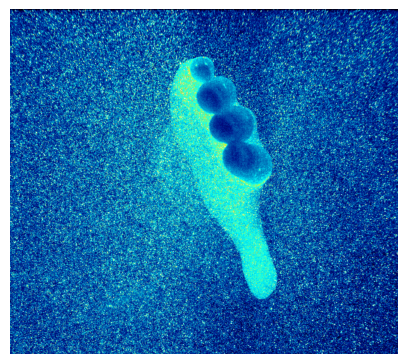

In [4]:
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

try:
    import google.colab
    parent_dir = os.path.join(scripts_dir, "Flow_segmentation")
except ImportError:
    parent_dir = os.path.join("Flow_segmentation")



scripts_dir = os.path.join(parent_dir, "Scripts")
sys.path.append(scripts_dir)

image_path = os.path.join(parent_dir, "Demo", "Fingers.png")

image_pil = Image.open(image_path).convert("RGB")
text_prompt = 'Fingers and a hand'

print("Text input:", text_prompt)

plt.figure(figsize=(5, 5))
plt.imshow(image_pil)
plt.axis('off')
plt.show()

image_pil = ImageOps.invert(image_pil)

### Compute masks

i:\My Drive\Flow_segmentation\Scripts\libs\GroundingDINO\groundingdino\models\GroundingDINO\ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


final text_encoder_type: bert-base-uncased
Check the latest .pth from: https://github.com/IDEA-Research/GroundingDINO/releases


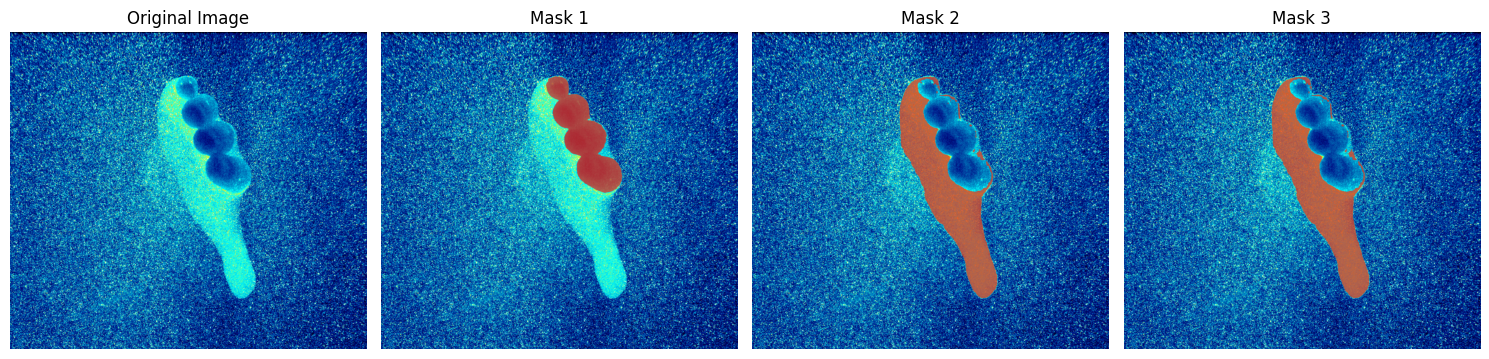

In [3]:
from Flow_segmentation import Superimpose_image_with_masks, Predictor, Groundingdino_model, Segmentation_model


groundingdino_model = Groundingdino_model()
sam_model = Segmentation_model(sam_type="vit_b", ckpt_path=None, device='cpu')

masks, boxes, phrases, logits = Predictor(image_pil, text_prompt, groundingdino_model, sam_model, box_threshold=0.3, text_threshold=0.25)

image_pil = ImageOps.invert(image_pil)

if len(masks) == 0:
    print(f"No objects of the '{text_prompt}' prompt detected in the image.")
else:
    # Convert masks to numpy arrays
    masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

    Superimpose_image_with_masks(image_pil, masks_np)
